<a href="https://colab.research.google.com/github/zainabhameed24/Zainab-Hameed_Intership_of_Developer-_Hub_Corporations_Tasks/blob/main/Internship_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4:**
Predicting Insurance Claim Amounts

Objective: Estimate the medical insurance claim amount based on personal data.

In [2]:
import pandas as pd
df=pd.read_csv("/content/insurance.csv")
print(df.head(2))
print(df.info)

   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523
<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  n

# **Explanation**
This dataset is used to estimate medical insurance charges (charges) based on personal and health-related features. It includes variables like age, sex, BMI (Body Mass Index), number of children, smoking status, and region. For example, younger, non-smoking individuals typically have lower charges. The feature smoker has a strong impact on cost due to higher health risks. The goal is to build a model that predicts insurance costs from these inputs.



**Train a Linear Regression model to predict charges. **



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df.drop("charges", axis=1)
y = df["charges"]

# Identify categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Create preprocessing for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns as is
)

# Create a pipeline with preprocessing and linear regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 33596915.85
R² Score: 0.78


# **Explanation**

This code builds a linear regression model to predict medical insurance charges using features like age, BMI, children, sex, smoking status, and region. It applies one-hot encoding to categorical variables and keeps numerical ones unchanged using a preprocessing pipeline. The dataset is split into training and testing sets, and the model is trained and evaluated. The output shows a Mean Squared Error (MSE) of 33,596,915.85, indicating the average squared difference between actual and predicted charges.On average, the square of the error between your predicted charges and actual charges is 33,596,915.85. Because we are predicting medical charges, this number is in rupees or dollars squared The R² Score of 0.78 suggests that the model explains 78% of the variance in the target variable.



***Visualize how BMI, age, and smoking status impact insurance charges. ***

  Feature   Coefficient
0     Age    259.547492
1     BMI    322.615133
2  Smoker  23823.684495
Intercept is -11676.830425187778


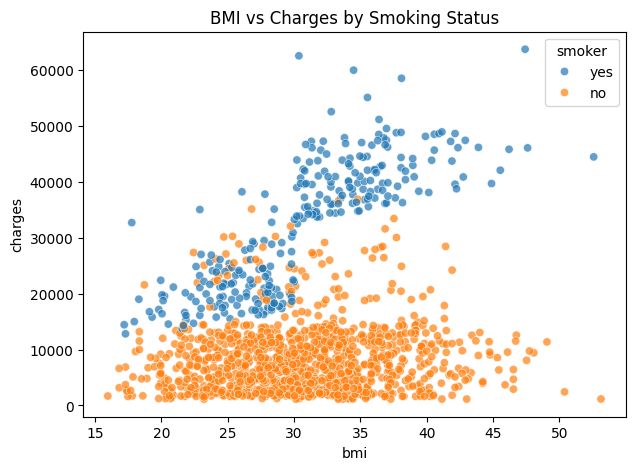

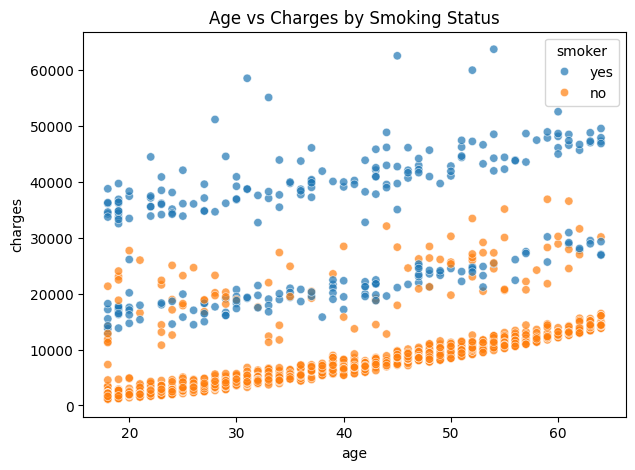

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


the predicted smoker is [27677.69125199 27922.41787417 28167.14449635 28411.87111853
 28656.59774071 28901.32436289 29146.05098508 29390.77760726
 29635.50422944 29880.23085162 30124.9574738  30369.68409598
 30614.41071816 30859.13734035 31103.86396253 31348.59058471
 31593.31720689 31838.04382907 32082.77045125 32327.49707343
 32572.22369561 32816.9503178  33061.67693998 33306.40356216
 33551.13018434 33795.85680652 34040.5834287  34285.31005088
 34530.03667307 34774.76329525 35019.48991743 35264.21653961
 35508.94316179 35753.66978397 35998.39640615 36243.12302833
 36487.84965052 36732.5762727  36977.30289488 37222.02951706
 37466.75613924 37711.48276142 37956.2093836  38200.93600579
 38445.66262797 38690.38925015 38935.11587233 39179.84249451
 39424.56911669 39669.29573887]
the predicted Non-smoker is [ 3854.00675668  4098.73337886  4343.46000104  4588.18662322
  4832.9132454   5077.63986759  5322.36648977  5567.09311195
  5811.81973413  6056.54635631  6301.27297849  6545.99960067
 

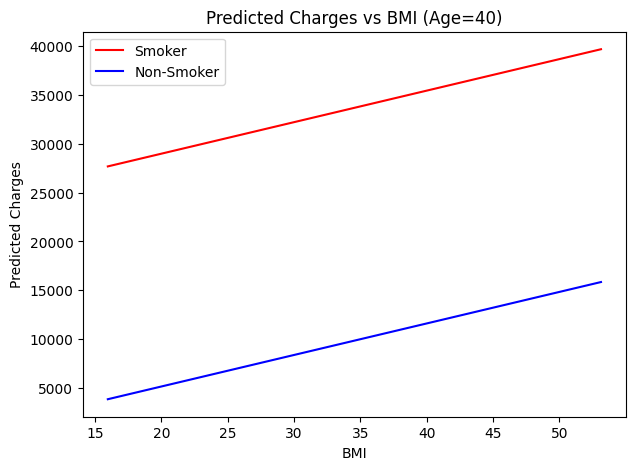

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


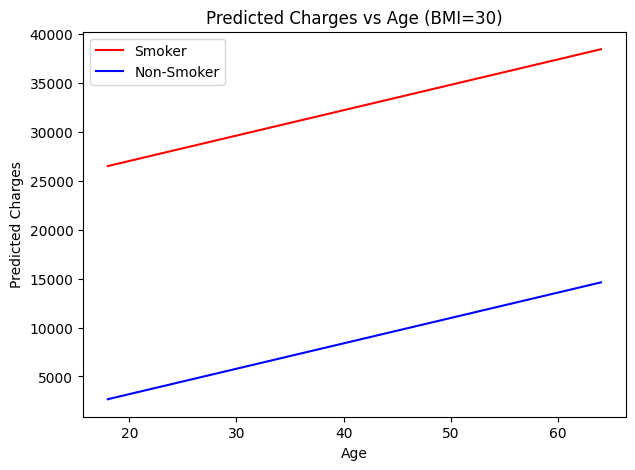

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/content/insurance.csv")  # Medical Cost Personal Dataset

# Encode smoker (yes=1, no=0)
le = LabelEncoder()
df['smoker_encoded'] = le.fit_transform(df['smoker'])

# Features and target
X = df[['age', 'bmi', 'smoker_encoded']]
y = df['charges']

# Train model
model = LinearRegression()
model.fit(X, y)

# Show learned coefficients
coef_df = pd.DataFrame({
    'Feature': ['Age', 'BMI', 'Smoker'],
    'Coefficient': model.coef_
})
print(coef_df)
print("Intercept is",model.intercept_)

# -------- VISUALIZATIONS --------

# 1. Scatter: BMI vs Charges by Smoker
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.7)
plt.title("BMI vs Charges by Smoking Status")
plt.show()

# 2. Scatter: Age vs Charges by Smoker
plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, alpha=0.7)
plt.title("Age vs Charges by Smoking Status")
plt.show()

# 3. Model-predicted effect of BMI (fix age=40)
bmi_range = np.linspace(df['bmi'].min(), df['bmi'].max(), 50)
pred_smoker = model.predict(np.column_stack([np.full(50, 40), bmi_range, np.ones(50)]))
pred_non_smoker = model.predict(np.column_stack([np.full(50, 40), bmi_range, np.zeros(50)]))
print("the predicted smoker is",pred_smoker)
print("the predicted Non-smoker is",pred_non_smoker)

plt.figure(figsize=(7,5))
plt.plot(bmi_range, pred_smoker, label='Smoker', color='red')
plt.plot(bmi_range, pred_non_smoker, label='Non-Smoker', color='blue')
plt.title("Predicted Charges vs BMI (Age=40)")
plt.xlabel("BMI")
plt.ylabel("Predicted Charges")
plt.legend()
plt.show()

# 4. Model-predicted effect of Age (fix BMI=30)
age_range = np.linspace(df['age'].min(), df['age'].max(), 50)
pred_smoker_age = model.predict(np.column_stack([age_range, np.full(50, 30), np.ones(50)]))
pred_non_smoker_age = model.predict(np.column_stack([age_range, np.full(50, 30), np.zeros(50)]))

plt.figure(figsize=(7,5))
plt.plot(age_range, pred_smoker_age, label='Smoker', color='red')
plt.plot(age_range, pred_non_smoker_age, label='Non-Smoker', color='blue')
plt.title("Predicted Charges vs Age (BMI=30)")
plt.xlabel("Age")
plt.ylabel("Predicted Charges")
plt.legend()
plt.show()

***Evaluate model performance using MAE and RMSE. ***

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions for the whole dataset
y_pred = model.predict(X)

# Mean Absolute Error
mae = mean_absolute_error(y, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 4216.775692234114
Root Mean Squared Error (RMSE): 6083.206042088949
